In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(image, name=''):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

### Canny边缘检测

Canny边缘检测是一种经典的边缘检测方法，它旨在提供高精度的边缘检测，同时尽量减少错误检测的边缘数量。

Canny边缘检测算法步骤：</br>
1)    使用高斯滤波器，以平滑图像，滤除噪声（去噪）。

2)    计算图像的一阶和二阶导数，以确定边缘的方向和强度。

3)    应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应，保留边缘方向上的最大强度值。

4)    应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘（强边缘和弱边缘）。

5)    通过抑制孤立的弱边缘最终完成边缘检测。使用滞后阈值（Hysteresis Thresholding）来连接弱边缘并排除非边缘。

##### 原理解释：

1. 使用高斯滤波器去噪

<img src='assets/canny_1.png' />

2. 计算梯度强度和方向

<img src='assets/canny_2.png' />

上图中，Sx和Sy分别Sobel算子的两个核，而Gx和Gy分别表示原图在水平和垂直方向上的梯度

3. 非极大值抑制

非极大值抑制方法1：

<img src='assets/canny_3.png' />

非极大值抑制方法2：

<img src='assets/canny_4.png' />

4. 双阈值检测

<img src='assets/canny_5.png' />

##### edges = cv2.Canny(image, threshold1, threshold2)

参数：</br>
- image：输入图像，可以是灰度图像或者彩色图像。如果是彩色图像，会先将其转换为灰度图像。
- threshold1：低阈值，用于确定边缘的强度。低于这个阈值的边缘会被视为弱边缘。
- threshold2：高阈值，用于确定边缘的强度。高于这个阈值的边缘会被视为强边缘。通常，高阈值是低阈值的两倍。

返回值：</br>
- 返回值 edges 是应用了 Canny 边缘检测后的图像，其中边缘以白色显示，非边缘区域以黑色显示

##### 示例

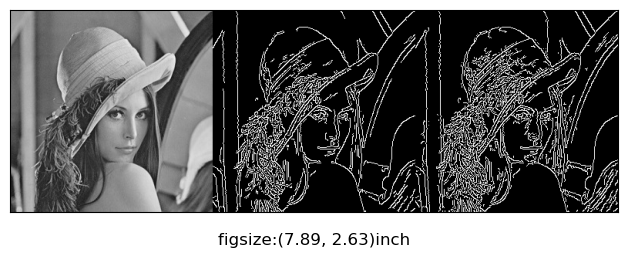

In [3]:
img = cv2.imread('assets/lena.jpg', cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img, threshold1=80, threshold2=150)
v2 = cv2.Canny(img, threshold1=50, threshold2=100)

res = np.hstack((img, v1, v2))
cv_show('', res)
plt_show(res)

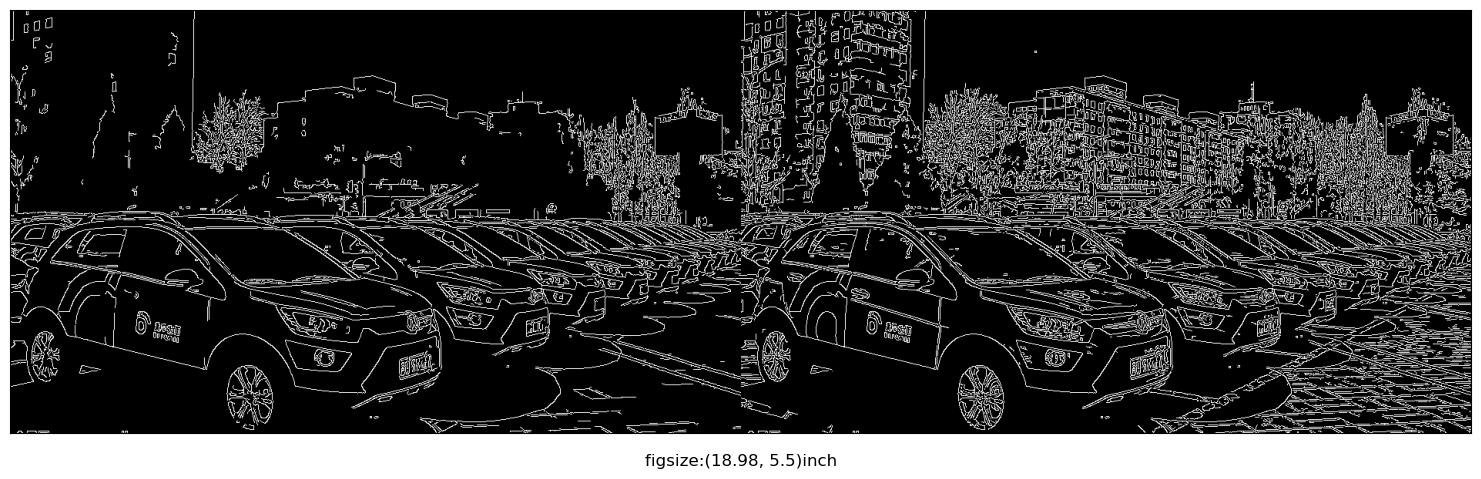

In [4]:
img = cv2.imread('assets/car.png', cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img, threshold1=120, threshold2=250)
v2 = cv2.Canny(img, threshold1=50, threshold2=100)

res = np.hstack((v1, v2))
cv_show('', res)
plt_show(res)